In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/데이콘/fifa선수이적료예측/FIFA_train.csv")
test = pd.read_csv("/content/drive/MyDrive/데이콘/fifa선수이적료예측/FIFA_test.csv")
submission = pd.read_csv("/content/drive/MyDrive/데이콘/fifa선수이적료예측/submission.csv")

In [ ]:
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [ ]:
train.drop(['id', 'name'], axis=1, inplace=True)

In [ ]:
#숫자/연속자료형
nums = ['age', 'stat_overall', 'stat_potential']

#범주자료형
cats = ['continent', 'contract_until', 'position', 'prefer_foot', 'reputation', 'stat_skill_moves']

#예측할 변수
y = 'value'

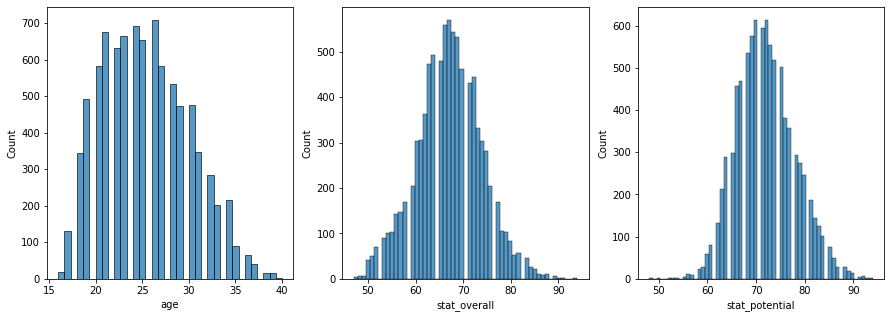

In [ ]:
f, axes = plt.subplots(1, len(nums), figsize=(15, 5))
axes = axes.flatten()
for col, ax in zip(nums, axes):
  sns.histplot(data=train, x=col, ax=ax)

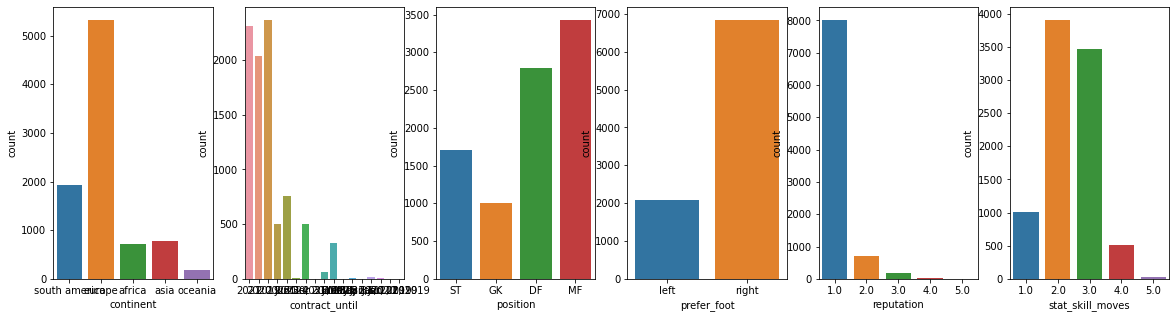

In [ ]:
f, axes = plt.subplots(1, len(cats), figsize=(20,5))
axes = axes.flatten()
for col, ax in zip(cats, axes):
  sns.countplot(data=train, x=col, ax=ax)

plt.show()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               8932 non-null   int64  
 1   continent         8932 non-null   object 
 2   contract_until    8932 non-null   object 
 3   position          8932 non-null   object 
 4   prefer_foot       8932 non-null   object 
 5   reputation        8932 non-null   float64
 6   stat_overall      8932 non-null   int64  
 7   stat_potential    8932 non-null   int64  
 8   stat_skill_moves  8932 non-null   float64
 9   value             8932 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 697.9+ KB


**numerical** :

 id, age, reputation, stat_overall, stat_potential, stat_skill_moves, value

**categorical** :

 name, continent, contract_until, position, prefer_foot

In [ ]:
train.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [ ]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               8932 non-null   int64  
 1   continent         8932 non-null   object 
 2   contract_until    8932 non-null   object 
 3   position          8932 non-null   object 
 4   prefer_foot       8932 non-null   object 
 5   reputation        8932 non-null   float64
 6   stat_overall      8932 non-null   int64  
 7   stat_potential    8932 non-null   int64  
 8   stat_skill_moves  8932 non-null   float64
 9   value             8932 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 697.9+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                

결측치 X

train - 7개 수치형, 5개 범주형

test - 6개 수치형, 5개 범주형

In [ ]:
train.describe()

,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8.932000e+03
mean,25.209136,1.130878,67.091133,71.997201,2.401702,2.778673e+06
std,4.635515,0.423792,6.854910,5.988147,0.776048,5.840982e+06
min,16.000000,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,21.000000,1.000000,63.000000,68.000000,2.000000,3.750000e+05
50%,25.000000,1.000000,67.000000,72.000000,2.000000,8.250000e+05
75%,28.000000,1.000000,72.000000,76.000000,3.000000,2.600000e+06
max,40.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


- age : 16세 ~ 40세까지 다양함
- reputation : 1부터 5까지의 점수값을 갖는 듯 (범주형)
  - 대부분의 선수가 1
- stat_overall : 47~94
- stat_skill_moves : 1~5 점수값 (범주형)??



In [ ]:
train.describe(include=['O'])

,continent,contract_until,position,prefer_foot
count,8932,8932,8932,8932
unique,5,17,4,2
top,europe,2019,MF,right
freq,5322,2366,3428,6837


- continent : 8932명 중 5322명이 europe 대륙
- contract_until : 2019년에 계약한 선수가 가장 많음(2366명)
- position : 38%가 MF
- prefer_foot : 76%가 right(오른발) 을 선호함

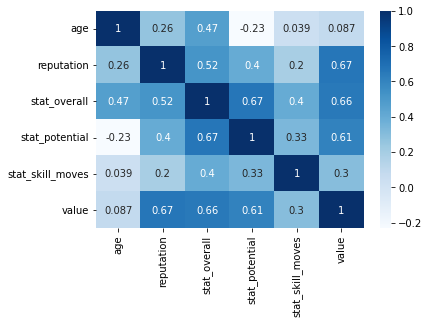

In [ ]:
plt.figure(figsize=((6, 4)))
sns.heatmap(train.corr(), annot=True, cmap='Blues')

In [ ]:
train[['reputation', 'value']].groupby(['reputation'], as_index=False).mean().sort_values(by='value', ascending=False)

,reputation,value
4,5.0,6.062500e+07
3,4.0,3.342903e+07
2,3.0,2.201483e+07
1,2.0,8.639221e+06
0,1.0,1.690092e+06


In [ ]:
train[['stat_overall', 'value']].groupby(['stat_overall'], as_index=False).mean().sort_values(by='value', ascending=False)

,stat_overall,value
45,94,1.105000e+08
44,91,6.766667e+07
43,90,5.733333e+07
41,88,5.360000e+07
42,89,5.014286e+07
40,87,4.938889e+07
39,86,3.981818e+07
38,85,3.356818e+07
37,84,2.855556e+07
36,83,2.521739e+07


In [ ]:
train[['stat_skill_moves', 'value']].groupby(['stat_skill_moves'], as_index=False).mean().sort_values(by='value', ascending=False)

,stat_skill_moves,value
4,5.0,2.005161e+07
3,4.0,1.100068e+07
2,3.0,3.128878e+06
0,1.0,1.992073e+06
1,2.0,1.448798e+06


In [ ]:
train[['stat_potential', 'value']].groupby(['stat_potential'], as_index=False).mean().sort_values(by='value', ascending=False)

,stat_potential,value
44,94,1.105000e+08
41,91,5.910000e+07
43,93,5.633333e+07
42,92,4.485714e+07
40,90,4.367857e+07
39,89,3.936667e+07
38,88,2.771071e+07
37,87,2.597586e+07
36,86,1.969900e+07
35,85,1.499967e+07


In [ ]:
train[['position', 'value']].groupby(['position'], as_index=False).mean().sort_values(by='value', ascending=False)

,position,value
3,ST,3.330361e+06
2,MF,3.121762e+06
0,DF,2.304348e+06
1,GK,1.992073e+06


In [ ]:
train[['prefer_foot', 'value']].groupby(['prefer_foot'], as_index=False).mean().sort_values(by='value', ascending=False)

,prefer_foot,value
0,left,2.865232e+06
1,right,2.752150e+06


In [ ]:
train[['continent', 'value']].groupby(['continent'], as_index=False).mean().sort_values(by='value', ascending=False)

,continent,value
4,south america,3.183204e+06
0,africa,2.972247e+06
2,europe,2.928125e+06
1,asia,1.035146e+06
3,oceania,8.225429e+05


In [ ]:
train[['contract_until', 'value']].groupby(['contract_until'], as_index=False).mean().sort_values(by='value', ascending=False)

,contract_until,value
8,2026,5.050000e+07
6,2024,2.450833e+07
7,2025,1.405333e+07
16,"May 31, 2020",7.500000e+06
4,2022,5.899074e+06
5,2023,5.802115e+06
14,"Jun 30, 2020",4.088889e+06
13,"Jun 30, 2019",3.067136e+06
3,2021,2.827543e+06
15,"May 31, 2019",2.645789e+06


In [ ]:
for dataset in combine:
  dataset['position'] = dataset['position'].map({'ST': 1, 'MF': 2, 'DF': 3, 'GK': 4}).astype(int)

train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,1,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,4,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,1,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,3,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,4,right,3.0,90,93,1.0,68000000.0


In [ ]:
def func(string:object) -> int:
    string = string[-4:]
    return int(string)

for dataset in combine:
    dataset['contract_until'] = dataset['contract_until'].apply(func)

In [ ]:
train['contract_until'].value_counts()

2019    2899
2021    2308
2020    2051
2022     761
2023     506
2018     391
2024      12
2025       3
2026       1
Name: contract_until, dtype: int64

In [ ]:
test.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,1,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,1,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,2,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,1,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,2,right,4.0,91,91,4.0


In [ ]:
train = train.drop(['name', 'id'], axis=1)
test = test.drop(['name', 'id'], axis=1)

In [ ]:
train.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,31,south america,2021,1,left,5.0,94,94,4.0,110500000.0
1,27,europe,2020,4,right,4.0,91,93,1.0,72000000.0
2,31,south america,2021,1,right,5.0,91,91,3.0,80000000.0
3,32,europe,2020,3,right,4.0,91,91,3.0,51000000.0
4,25,europe,2021,4,right,3.0,90,93,1.0,68000000.0


In [ ]:
ranges = [46, 56, 68, 77, 87, 94]
train['OverallBand'] = pd.cut(train['stat_overall'], ranges)
train[['OverallBand', 'value']].groupby(['OverallBand'], as_index=False).mean().sort_values(by='OverallBand', ascending=True)

,OverallBand,value
0,"(46, 56]",1.091935e+05
1,"(56, 68]",5.626920e+05
2,"(68, 77]",3.649873e+06
3,"(77, 87]",1.785965e+07
4,"(87, 94]",5.718750e+07


In [ ]:
train.loc[(train['stat_overall'] > 46) & (train['stat_overall'] <= 56), 'stat_overall'] = 1
train.loc[(train['stat_overall'] > 56) & (train['stat_overall'] <= 68), 'stat_overall'] = 2
train.loc[(train['stat_overall'] > 68) & (train['stat_overall'] <= 77), 'stat_overall'] = 3
train.loc[(train['stat_overall'] > 77) & (train['stat_overall'] <= 87), 'stat_overall'] = 4
train.loc[(train['stat_overall'] > 87) & (train['stat_overall'] <= 94), 'stat_overall'] = 5

train.tail()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,OverallBand
8927,18,africa,2019,2,right,1.0,1,63,3.0,60000.0,"(46, 56]"
8928,19,europe,2020,3,right,1.0,1,59,2.0,40000.0,"(46, 56]"
8929,18,south america,2021,3,right,1.0,1,64,2.0,50000.0,"(46, 56]"
8930,18,europe,2021,4,right,1.0,1,65,1.0,50000.0,"(46, 56]"
8931,19,europe,2020,1,right,1.0,1,63,2.0,60000.0,"(46, 56]"


In [ ]:
train = train.drop(['OverallBand'], axis=1)
train.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,31,south america,2021,1,left,5.0,5,94,4.0,110500000.0
1,27,europe,2020,4,right,4.0,5,93,1.0,72000000.0
2,31,south america,2021,1,right,5.0,5,91,3.0,80000000.0
3,32,europe,2020,3,right,4.0,5,91,3.0,51000000.0
4,25,europe,2021,4,right,3.0,5,93,1.0,68000000.0


In [ ]:
test.loc[(test['stat_overall'] > 46) & (test['stat_overall'] <= 56), 'stat_overall'] = 1
test.loc[(test['stat_overall'] > 56) & (test['stat_overall'] <= 68), 'stat_overall'] = 2
test.loc[(test['stat_overall'] > 68) & (test['stat_overall'] <= 77), 'stat_overall'] = 3
test.loc[(test['stat_overall'] > 77) & (test['stat_overall'] <= 87), 'stat_overall'] = 4
test.loc[(test['stat_overall'] > 87) & (test['stat_overall'] <= 94), 'stat_overall'] = 5

In [ ]:
test.tail()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
3823,20,asia,2021,2,right,1.0,1,63,2.0
3824,18,europe,2018,4,right,1.0,1,65,1.0
3825,18,south america,2021,2,right,1.0,1,65,2.0
3826,18,europe,2020,1,right,1.0,1,61,2.0
3827,19,asia,2021,2,right,1.0,1,61,2.0


In [ ]:
train.loc[(train['stat_potential'] > 47) & (train['stat_potential'] <= 58), 'stat_potential'] = 1
train.loc[(train['stat_potential'] > 58) & (train['stat_potential'] <= 69), 'stat_potential'] = 2
train.loc[(train['stat_potential'] > 69) & (train['stat_potential'] <= 79), 'stat_potential'] = 3
train.loc[(train['stat_potential'] > 79) & (train['stat_potential'] <= 88), 'stat_potential'] = 4
train.loc[(train['stat_potential'] > 88) & (train['stat_potential'] <= 94), 'stat_potential'] = 5

train.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,31,south america,2021,1,left,5.0,5,5,4.0,110500000.0
1,27,europe,2020,4,right,4.0,5,5,1.0,72000000.0
2,31,south america,2021,1,right,5.0,5,5,3.0,80000000.0
3,32,europe,2020,3,right,4.0,5,5,3.0,51000000.0
4,25,europe,2021,4,right,3.0,5,5,1.0,68000000.0


In [ ]:
test.loc[(test['stat_potential'] > 47) & (test['stat_potential'] <= 58), 'stat_potential'] = 1
test.loc[(test['stat_potential'] > 58) & (test['stat_potential'] <= 69), 'stat_potential'] = 2
test.loc[(test['stat_potential'] > 69) & (test['stat_potential'] <= 79), 'stat_potential'] = 3
test.loc[(test['stat_potential'] > 79) & (test['stat_potential'] <= 88), 'stat_potential'] = 4
test.loc[(test['stat_potential'] > 88) & (test['stat_potential'] <= 94), 'stat_potential'] = 5

test.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,33,europe,2022,1,right,5.0,5,5,5.0
1,26,south america,2022,1,right,5.0,5,5,5.0
2,27,europe,2023,2,right,4.0,5,5,4.0
3,27,europe,2020,1,right,4.0,5,5,4.0
4,32,europe,2020,2,right,4.0,5,5,4.0


In [ ]:
train[['age', 'value']].groupby(['age'], as_index=False).mean().sort_values(by='value', ascending=False)

,age,value
15,31,4.230764e+06
11,27,4.015551e+06
10,26,3.917331e+06
13,29,3.827754e+06
9,25,3.713219e+06
14,30,3.438099e+06
8,24,3.325760e+06
16,32,3.253140e+06
12,28,3.146438e+06
7,23,3.124216e+06


In [ ]:
train['continent'].value_counts()

europe           5322
south america    1927
asia              787
africa            721
oceania           175
Name: continent, dtype: int64

In [ ]:
train['continent'] = train['continent'].map({'europe': 1, 'south america': 2, 'asia': 3, 'africa': 4, 'oceania': 5}).astype(int)
test['continent'] = test['continent'].map({'europe': 1, 'south america': 2, 'asia': 3, 'africa': 4, 'oceania': 5}).astype(int)

train.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,31,2,2021,1,left,5.0,5,5,4.0,110500000.0
1,27,1,2020,4,right,4.0,5,5,1.0,72000000.0
2,31,2,2021,1,right,5.0,5,5,3.0,80000000.0
3,32,1,2020,3,right,4.0,5,5,3.0,51000000.0
4,25,1,2021,4,right,3.0,5,5,1.0,68000000.0


In [ ]:
test.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,33,1,2022,1,right,5.0,5,5,5.0
1,26,2,2022,1,right,5.0,5,5,5.0
2,27,1,2023,2,right,4.0,5,5,4.0
3,27,1,2020,1,right,4.0,5,5,4.0
4,32,1,2020,2,right,4.0,5,5,4.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               8932 non-null   int64  
 1   continent         8932 non-null   int64  
 2   contract_until    8932 non-null   int64  
 3   position          8932 non-null   int64  
 4   prefer_foot       8932 non-null   object 
 5   reputation        8932 non-null   float64
 6   stat_overall      8932 non-null   int64  
 7   stat_potential    8932 non-null   int64  
 8   stat_skill_moves  8932 non-null   float64
 9   value             8932 non-null   float64
dtypes: float64(3), int64(6), object(1)
memory usage: 697.9+ KB


In [ ]:
train['reputation'] = train['reputation'].astype(int)

In [ ]:
test['reputation'] = test['reputation'].astype(int)
train['stat_skill_moves'] = train['stat_skill_moves'].astype(int)
test['stat_skill_moves'] = test['stat_skill_moves'].astype(int)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               8932 non-null   int64  
 1   continent         8932 non-null   int64  
 2   contract_until    8932 non-null   int64  
 3   position          8932 non-null   int64  
 4   prefer_foot       8932 non-null   object 
 5   reputation        8932 non-null   int64  
 6   stat_overall      8932 non-null   int64  
 7   stat_potential    8932 non-null   int64  
 8   stat_skill_moves  8932 non-null   int64  
 9   value             8932 non-null   float64
dtypes: float64(1), int64(8), object(1)
memory usage: 697.9+ KB


In [ ]:
train = train.drop(['prefer_foot'], axis=1)
test = test.drop(['prefer_foot'], axis=1)

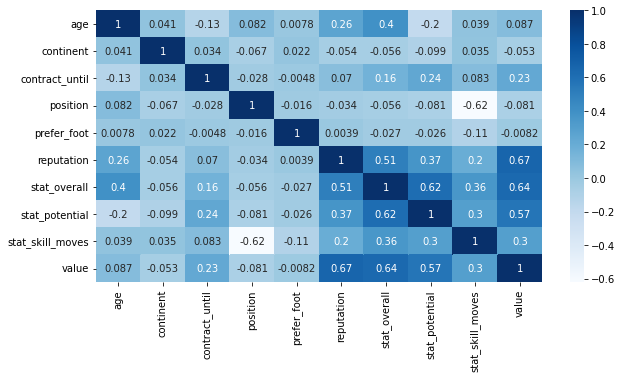

In [ ]:
plt.figure(figsize=((10, 5)))
sns.heatmap(train.corr(), annot=True, cmap='Blues')

In [ ]:
train.head(10)

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,31,2,2021,1,0,5,5,5,4,110500000.0
1,27,1,2020,4,1,4,5,5,1,72000000.0
2,31,2,2021,1,1,5,5,5,3,80000000.0
3,32,1,2020,3,1,4,5,5,3,51000000.0
4,25,1,2021,4,1,3,5,5,1,68000000.0
5,32,2,2019,3,1,3,5,5,2,44000000.0
6,32,1,2020,2,0,4,5,5,4,60000000.0
7,27,1,2023,2,1,3,5,5,2,63000000.0
8,26,1,2022,4,1,3,5,5,1,58000000.0
9,26,1,2024,4,0,4,5,5,1,53500000.0


In [ ]:
train['contract_until'].value_counts()

2019    2899
2021    2308
2020    2051
2022     761
2023     506
2018     391
2024      12
2025       3
2026       1
Name: contract_until, dtype: int64

In [ ]:
train['contract_until'] = train['contract_until'] - 2018

In [ ]:
train = train.drop([train.index[22], train.index[48]])

In [ ]:
train.rename(columns={'contract_until': 'remain_contract'}, inplace=True)

In [ ]:
train.head()

,age,continent,remain_contract,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,31,2,3,1,0,5,5,5,4,110500000.0
1,27,1,2,4,1,4,5,5,1,72000000.0
2,31,2,3,1,1,5,5,5,3,80000000.0
3,32,1,2,3,1,4,5,5,3,51000000.0
4,25,1,3,4,1,3,5,5,1,68000000.0


In [ ]:
train = train.drop(['remain_contract'], axis=1)

In [ ]:
train

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,31,2,3,1,0,5,5,5,4,110500000.0
1,27,1,2,4,1,4,5,5,1,72000000.0
2,31,2,3,1,1,5,5,5,3,80000000.0
3,32,1,2,3,1,4,5,5,3,51000000.0
4,25,1,3,4,1,3,5,5,1,68000000.0
...,...,...,...,...,...,...,...,...,...,...
8927,18,4,1,2,1,1,1,2,3,60000.0
8928,19,1,2,3,1,1,1,2,2,40000.0
8929,18,2,3,3,1,1,1,2,2,50000.0
8930,18,1,3,4,1,1,1,2,1,50000.0


In [ ]:
test['contract_until'] = test['contract_until'] - 2018
test.rename(columns={'contract_until': 'remain_contract'}, inplace=True)
test.head()

,age,continent,remain_contract,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,33,1,4,1,1,5,5,5,5
1,26,2,4,1,1,5,5,5,5
2,27,1,5,2,1,4,5,5,4
3,27,1,2,1,1,4,5,5,4
4,32,1,2,2,1,4,5,5,4


In [ ]:
X_train = train.drop("value", axis=1)
y_train = train["value"]
X_test = test

In [ ]:
X_train.shape, y_train.shape, X_test.shape

((8930, 9), (8930,), (3828, 9))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
rf = RandomForestRegressor(random_state = 521, n_estimators = 150)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = round(rf.score(X_train, y_train)*100,2)
acc_rf

96.93

In [ ]:
dt = DecisionTreeRegressor(random_state = 42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
acc_dt = round(dt.score(X_train, y_train)*100,2)
acc_dt

98.49

In [ ]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train)*100, 2)
acc_knn

84.36